In [5]:
import numpy as np
import sklearn
# we used the library sklearn here only to load the data

# You dont have to care about matplotlib for now
import matplotlib.pyplot as plt

# load data from sklearn
from sklearn.datasets import load_boston
data = load_boston()

In [6]:
print(data.keys())
X= data.data
y = data.target
feature_names = data.feature_names
print('data.data :{0}, data.target: {1}, num_features: {2}'.format(X.shape, y.shape, len(feature_names)))
print('num_datapoints : {}'.format(X.shape[0]))

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
data.data :(506, 13), data.target: (506,), num_features: 13
num_datapoints : 506


In [7]:
def training(X, y):
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)


    A = np.dot(Xbar.T, Xbar)
    b = np.dot(Xbar.T, y)
    w = np.dot(np.linalg.pinv(A), b)

    intercept = w[0]
    coefficients = w[1:]
    return coefficients, intercept
coefficients, intercept = training(X, y)
assert np.allclose(coefficients,
                   np.array([-1.08011358e-01,  4.64204584e-02,  2.05586264e-02,  2.68673382e+00,
                             -1.77666112e+01,  3.80986521e+00,  6.92224640e-04, -1.47556685e+00,
                             3.06049479e-01, -1.23345939e-02, -9.52747232e-01,  9.31168327e-03,
                             -5.24758378e-01]))
assert np.allclose(intercept, 36.459488385090125)

In [8]:
def prediction(X, coefficients, intercept):
    w = np.array([intercept])
    w = np.concatenate((w, coefficients))
    one = np.ones((X.shape[0], 1))
    Xbar = np.concatenate((one, X), axis = 1)
    y_predict = Xbar @ w
    return y_predict 

y_predict = prediction(X, coefficients, intercept)

In [9]:
def MSE(X, y_target, coefficients, intercept):
    """Calculate the mean square error of your model
    X: is a the input matrix , which rows are examples and columns are features
    y_target : a vector,contains the true housing prices for all houses in the dataset
    coefficients and scalar: calculated above, used to compute y_predict
    
    return:
    MSE: a scalar"""
    
    # compute y_predict: the price prediction of our model for all houses
    #1 line of code
    y_predict = prediction(X, coefficients, intercept)
    
    # calculate MSE based on y_predict and y_target
    assert len(y_predict) == len(y_target)
    # 1 line of code
    MSE = ((y_predict - y_target) @ (y_predict - y_target).T) / X.shape[0]

    return MSE
mse = MSE(X, y, coefficients, intercept)
print(mse)
assert np.allclose(mse, 21.894831181729202)

21.89483118172921


In [10]:
## ploting to see our model
def visualize_results(y_predict, y_target):
    """ this function plot your y_predict and y_predict to see how closed they are"""
    
    plt.figure(figsize=(5, 4))
    plt.scatter(y_target, y_predict)
    plt.plot([0, 50], [0, 50], '--k')
    plt.axis('tight')
    plt.xlabel('True price ($1000s)')
    plt.ylabel('Predicted price ($1000s)')
    plt.tight_layout()

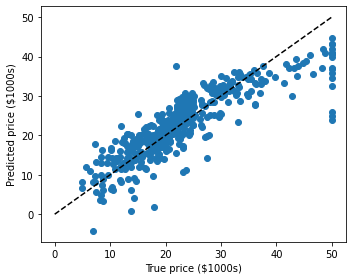

In [11]:
visualize_results(prediction(X, coefficients, intercept), y)